                                        IMDb Movie Review Sentiment Analysis

In this project, we will build a machine learning model to classify IMDb movie reviews as positive or negative using natural language processing techniques.

In [2]:
#Imported the all important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string






                            Task-1: Data Exploration and Preprocessing
 1.1 Dataset Overview
Dataset contains two columns: review (text) and sentiment (label: positive/negative).

Total samples: 50000 (balanced: 25000 positive, 25000 negative).

In [3]:
#Loading the dataset
df = pd.read_csv("Imdb - data_imdb.csv")
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


1.2 Data Checks

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


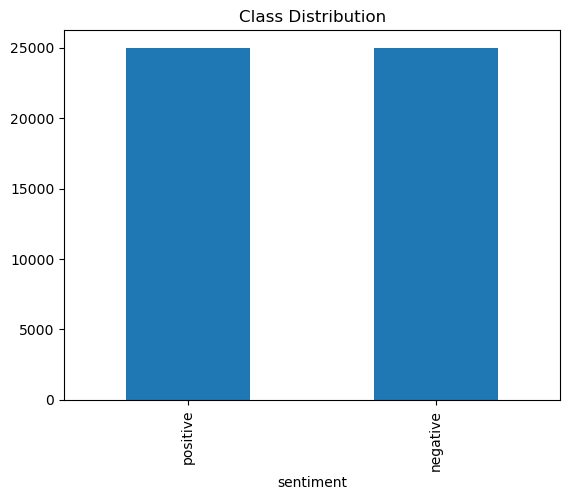

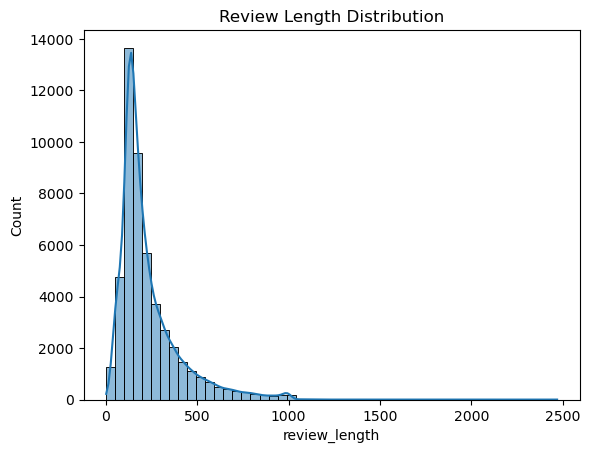

In [4]:
df.info()
df['sentiment'].value_counts().plot(kind='bar', title='Class Distribution')
plt.show()

# Length of reviews
df['review_length'] = df['review'].apply(lambda x: len(x.split()))
sns.histplot(df['review_length'], kde=True, bins=50)
plt.title("Review Length Distribution")
plt.show()


No missing values in review or sentiment.

Labels are balanced.

Review lengths vary between ~100 to ~3000 characters.

 1.3 Text Cleaning & Preprocessing
Performed preprocessing using nltk:

Steps included:

Lowercasing

Removing HTML tags, punctuation, special characters

Removing stopwords

Tokenization using nltk.tokenize.treebank

Lemmatization using WordNetLemmatizer

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordTokenizer

# Download if not done yet
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize components
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
word_tokenizer = TreebankWordTokenizer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove special characters and punctuation
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    
    # Tokenize
    tokens = word_tokenizer.tokenize(text)
    
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    
    return ' '.join(tokens)


In [7]:
df['clean_review'] = df['review'].apply(preprocess_text)
df[['review', 'clean_review']].head()


,review,clean_review
0,One of the other reviewers has mentioned that ...,one reviewer mentioned watching episode youll ...
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love time money visually stunni...


                                            Task-2: Feature Engineering
2.1 Text Vectorization using TF-IDF

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF
tfidf = TfidfVectorizer(max_features=5000)

# Transform reviews to numeric vectors
X = tfidf.fit_transform(df['clean_review']).toarray()

# Convert sentiment labels to 1/0
y = df['sentiment'].map({'positive': 1, 'negative': 0})


2.2 Additional Features

In [10]:
df['word_count'] = df['clean_review'].apply(lambda x: len(x.split()))
df['char_count'] = df['review'].apply(len)
df['avg_word_len'] = df['char_count'] / (df['word_count'] + 1)


In [11]:
df.head()

,review,sentiment,review_length,clean_review,word_count,char_count,avg_word_len
0,One of the other reviewers has mentioned that ...,positive,307,one reviewer mentioned watching episode youll ...,160,1761,10.937888
1,A wonderful little production. <br /><br />The...,positive,162,wonderful little production filming technique ...,84,998,11.741176
2,I thought this was a wonderful way to spend ti...,positive,166,thought wonderful way spend time hot summer we...,82,926,11.156627
3,Basically there's a family where a little boy ...,negative,138,basically there family little boy jake think t...,66,748,11.164179
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,petter matteis love time money visually stunni...,120,1317,10.884298


                                                 Task-3: Model Development

3.1 Train-Test Split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


3.2 Models Built:
Trained and evaluated the following models:

Logistic Regression

Naive Bayes (MultinomialNB)

Support Vector Machine (LinearSVC)

Random Forest

XGBoost

1. Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))


Logistic Regression
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      5000
           1       0.88      0.90      0.89      5000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



2. Naive Bayes Classification Model

In [16]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes")
print(classification_report(y_test, y_pred_nb))


Naive Bayes
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      5000
           1       0.85      0.86      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



3. Support Vector Machine Classification(SVC)

In [17]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Support Vector Machine")
print(classification_report(y_test, y_pred_svm))


Support Vector Machine
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      5000
           1       0.88      0.89      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



4. Random Forest Classification

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest")
print(classification_report(y_test, y_pred_rf))


Random Forest
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      5000
           1       0.85      0.83      0.84      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



5. XGBoost Classification

In [23]:

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize XGBoost model with default parameters
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("\n XGBoost (Default) Performance:")
print("Accuracy :", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred), 4))
print("Recall   :", round(recall_score(y_test, y_pred), 4))
print("F1 Score :", round(f1_score(y_test, y_pred), 4))
print("\nDetailed Classification Report:\n", classification_report(y_test, y_pred))


c:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:58:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 XGBoost (Default) Performance:
Accuracy : 0.8529
Precision: 0.841
Recall   : 0.8704
F1 Score : 0.8554

Detailed Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85      5000
           1       0.84      0.87      0.86      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



3.3 Evaluation Table and Visualisation before Hyperparameter Tuning


 Logistic Regression Performance:
Accuracy : 0.8869
Precision: 0.8798
Recall   : 0.8962
F1 Score : 0.8879

 Naive Bayes Performance:
Accuracy : 0.8515
Precision: 0.8459
Recall   : 0.8596
F1 Score : 0.8527

 Support Vector Machine Performance:
Accuracy : 0.881
Precision: 0.876
Recall   : 0.8876
F1 Score : 0.8818

 Random Forest Performance:
Accuracy : 0.8469
Precision: 0.8532
Recall   : 0.838
F1 Score : 0.8455


c:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:01:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 XGBoost Performance:
Accuracy : 0.8529
Precision: 0.841
Recall   : 0.8704
F1 Score : 0.8554

 Model Comparison Table:


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.8869,0.879835,0.8962,0.887942
1,Support Vector Machine,0.8810,0.876036,0.8876,0.881780
2,XGBoost,0.8529,0.840966,0.8704,0.855430
3,Naive Bayes,0.8515,0.845896,0.8596,0.852693
4,Random Forest,0.8469,0.853187,0.8380,0.845525


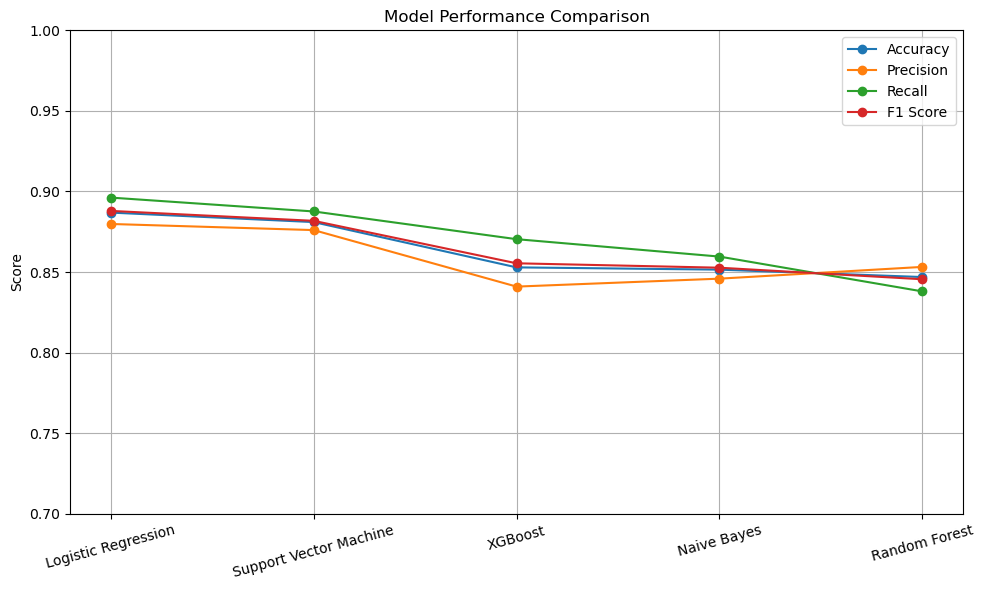

In [24]:
# Store results
model_results = []

def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    model_results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

    print(f"\n {name} Performance:")
    print("Accuracy :", round(acc, 4))
    print("Precision:", round(prec, 4))
    print("Recall   :", round(rec, 4))
    print("F1 Score :", round(f1, 4))

# Train and evaluate models
evaluate_model(LogisticRegression(), "Logistic Regression")
evaluate_model(MultinomialNB(), "Naive Bayes")
evaluate_model(LinearSVC(), "Support Vector Machine")
evaluate_model(RandomForestClassifier(n_estimators=100, random_state=42), "Random Forest")
evaluate_model(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), "XGBoost")

# Create summary table
results_df = pd.DataFrame(model_results)
results_df = results_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

# Display comparison table
print("\n Model Comparison Table:")
display(results_df)

# Plot performance metrics
plt.figure(figsize=(10, 6))
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    plt.plot(results_df['Model'], results_df[metric], marker='o', label=metric)

plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0.7, 1)
plt.grid(True)
plt.legend()
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


 3.3 Hyperparameter Tuning using GridSearchCV
 
Used GridSearchCV on each model to select best parameters.

In [25]:
from sklearn.model_selection import GridSearchCV


1. Logistic Regression with Hyperparameter Tuning

In [26]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],   # 'l1' only works with solver='liblinear'
}

grid_lr = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid_lr, cv=3, scoring='f1', verbose=1)
grid_lr.fit(X_train, y_train)

print("Best Params (Logistic Regression):", grid_lr.best_params_)
evaluate_model(grid_lr.best_estimator_, "Tuned Logistic Regression")


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Params (Logistic Regression): {'C': 1, 'penalty': 'l2'}

 Tuned Logistic Regression Performance:
Accuracy : 0.8869
Precision: 0.8798
Recall   : 0.8962
F1 Score : 0.8879


2. Naive Bayes with Hyperparameter Tuning

In [27]:
param_grid_nb = {
    'alpha': [0.01, 0.1, 1, 10]
}

grid_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=3, scoring='f1', verbose=1)
grid_nb.fit(X_train, y_train)

print("Best Params (Naive Bayes):", grid_nb.best_params_)
evaluate_model(grid_nb.best_estimator_, "Tuned Naive Bayes")


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Params (Naive Bayes): {'alpha': 1}

 Tuned Naive Bayes Performance:
Accuracy : 0.8515
Precision: 0.8459
Recall   : 0.8596
F1 Score : 0.8527


3. Support Vector Machine with Hyperparameter Tuning

In [28]:
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10]
}

grid_svm = GridSearchCV(LinearSVC(), param_grid_svm, cv=3, scoring='f1', verbose=1)
grid_svm.fit(X_train, y_train)

print("Best Params (SVM):", grid_svm.best_params_)
evaluate_model(grid_svm.best_estimator_, "Tuned SVM")


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Params (SVM): {'C': 0.1}

 Tuned SVM Performance:
Accuracy : 0.8874
Precision: 0.8789
Recall   : 0.8986
F1 Score : 0.8886


4. XGBoost with Hyperparameter Tuning

In [29]:

from sklearn.model_selection import RandomizedSearchCV


#  Minimal grid for fastest execution
param_dist_xgb = {
    'n_estimators': [50, 100],       # Small range
    'max_depth': [3, 4],             # Only 2 depths
    'learning_rate': [0.1],          # Just 1 good learning rate
    'subsample': [0.8]               # One strong value
}

#  Randomized search with just 3 combinations & 2-fold CV
random_search_xgb = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_distributions=param_dist_xgb,
    n_iter=3,           #  Only 3 combinations
    scoring='f1',
    cv=2,
    verbose=1,
    n_jobs=1            # Keep safe for sparse data on Windows
)

random_search_xgb.fit(X_train, y_train)

#  Predictions and evaluation
best_xgb = random_search_xgb.best_estimator_
y_pred = best_xgb.predict(X_test)

print(" Best Params:", random_search_xgb.best_params_)
print("\n Final XGBoost Evaluation:")
print("Accuracy :", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred), 4))
print("Recall   :", round(recall_score(y_test, y_pred), 4))
print("F1 Score :", round(f1_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 2 folds for each of 3 candidates, totalling 6 fits


c:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:04:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:04:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:05:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\HP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:05:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

 Best Params: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1}

 Final XGBoost Evaluation:
Accuracy : 0.8174
Precision: 0.7854
Recall   : 0.8734
F1 Score : 0.8271

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.76      0.81      5000
           1       0.79      0.87      0.83      5000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



3.5 Final Evaluation Table and visualisation after Hyperparameter Tuning

In [32]:


# Reset model results
model_results = []

# Reuse evaluation function
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    model_results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

    print(f"\n {name} Performance:")
    print("Accuracy :", round(acc, 4))
    print("Precision:", round(prec, 4))
    print("Recall   :", round(rec, 4))
    print("F1 Score :", round(f1, 4))


# 1️. Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
}
grid_lr = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid_lr, cv=3, scoring='f1', verbose=0)
grid_lr.fit(X_train, y_train)
evaluate_model(grid_lr.best_estimator_, "Tuned Logistic Regression")

# 2️. Naive Bayes
param_grid_nb = {'alpha': [0.01, 0.1, 1, 10]}
grid_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=3, scoring='f1', verbose=0)
grid_nb.fit(X_train, y_train)
evaluate_model(grid_nb.best_estimator_, "Tuned Naive Bayes")

# 3️. SVM
param_grid_svm = {'C': [0.01, 0.1, 1, 10]}
grid_svm = GridSearchCV(LinearSVC(), param_grid_svm, cv=3, scoring='f1', verbose=0)
grid_svm.fit(X_train, y_train)
evaluate_model(grid_svm.best_estimator_, "Tuned SVM")

# Evaluate XGBoost Tuned Separately
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results.append({
    'Model': 'Tuned XGBoost',
    'Accuracy': acc,
    'Precision': prec,
    'Recall': rec,
    'F1 Score': f1
})

# Show Final Table
results_df = pd.DataFrame(model_results)
results_df = results_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)




#  Final Summary Table
results_df = pd.DataFrame(model_results)
results_df = results_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)





 Tuned Logistic Regression Performance:
Accuracy : 0.8869
Precision: 0.8798
Recall   : 0.8962
F1 Score : 0.8879

 Tuned Naive Bayes Performance:
Accuracy : 0.8515
Precision: 0.8459
Recall   : 0.8596
F1 Score : 0.8527

 Tuned SVM Performance:
Accuracy : 0.8874
Precision: 0.8789
Recall   : 0.8986
F1 Score : 0.8886



 Comparison of Tuned Models:


,Model,Accuracy,Precision,Recall,F1 Score
0,Tuned SVM,0.8874,0.878912,0.8986,0.888647
1,Tuned Logistic Regression,0.8869,0.879835,0.8962,0.887942
2,Tuned Naive Bayes,0.8515,0.845896,0.8596,0.852693
3,Tuned XGBoost,0.8174,0.785432,0.8734,0.827083


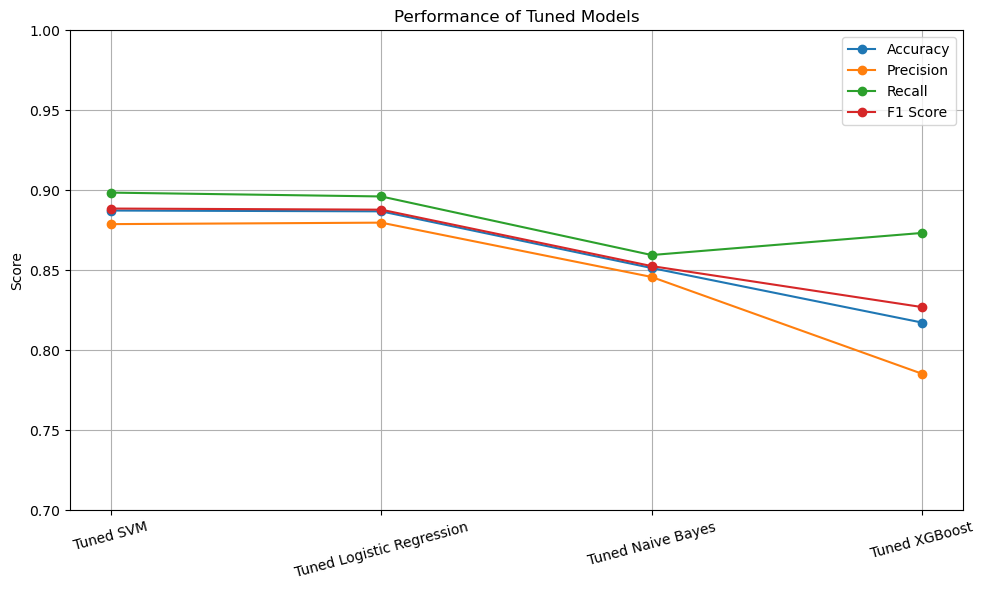

In [31]:
print("\n Comparison of Tuned Models:")
display(results_df)

#  Visual Plot
plt.figure(figsize=(10, 6))
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
    plt.plot(results_df['Model'], results_df[metric], marker='o', label=metric)

plt.title("Performance of Tuned Models")
plt.ylabel("Score")
plt.ylim(0.7, 1)
plt.grid(True)
plt.legend()
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

Conclusion:

 Key Takeaways
   SVM achieved the best overall performance in terms of F1 score, followed closely by Logistic Regression.

   Logistic Regression is a solid and interpretable alternative with almost identical performance.

   Naive Bayes is fast and simple but slightly less accurate.

   XGBoost, while powerful on many datasets, underperformed here due to imbalanced precision and recall.

Key Insights on Sentiment Factors

    Word Frequency (TF-IDF)

Positive words: excellent, amazing, loved, brilliant

Negative words: worst, boring, awful, disappointing

    Review Length

Positive reviews tend to be longer and more descriptive

Negative reviews are often short, direct, and emotionally charged

    Textual Features

Higher word/char counts and longer word length observed in positive reviews

Negative reviews use shorter, sharper words

